In [49]:
import argparse
from collections import defaultdict
import difflib
import json
import os
import pickle
import re
import sys

from datasets import load_dataset
from dotenv import load_dotenv
import inflect
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from tqdm import tqdm

sys.path.append(os.path.abspath('..'))
# from config import ArchiveGame
from java_api import Novelty
from fitness_helpers import _evaluate_fitness

In [50]:
DATA_DIR = '../exp_outputs'
valid_dirs = list(sorted([path for path in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, path))]))
dropdown = widgets.Dropdown(
    options=valid_dirs,
    description='Experiment directory:',
    disabled=False,
    style={'description_width': 'initial'}
)
dropdown

Dropdown(description='Experiment directory:', options=('evaluations', 'feb_24_full_run', 'feb_25_full_run', 'f…

In [55]:
archive_filenames = list(sorted([f for f in os.listdir(os.path.join(DATA_DIR, dropdown.value)) if f.endswith('.pkl')], key=lambda x: os.path.getmtime(os.path.join(DATA_DIR, dropdown.value, x))))

In [4]:
def get_qd_score(archive, min_fitness=0):
    qd_score = 0
    for key, games in archive.items():
        for game in games:
            qd_score += (game.fitness_score - min_fitness)

    return qd_score

/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/1371827970.py:8: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


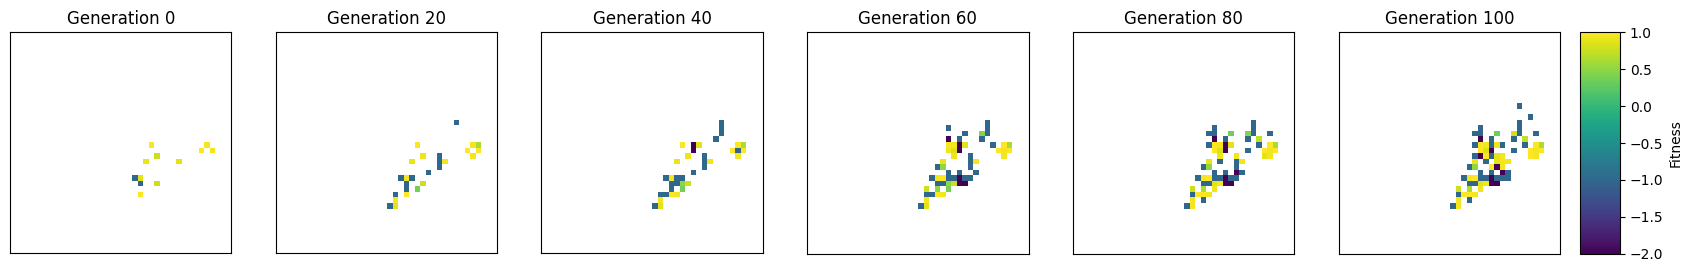

In [48]:
TARGET_GENS = [0, 100, 200, 300, 400, 500]
NUM_PLOTS = len(TARGET_GENS)
fig, axs = plt.subplots(1, NUM_PLOTS, figsize=(20, 5))

plot_index = 0
for i, archive_filename in enumerate(archive_filenames):

    archive = pickle.load(open(os.path.join(DATA_DIR, dropdown.value, archive_filename), "rb"))
    gen = archive_filename.split('_')[-1].split('.')[0]
    
    fitnesses = np.ones((40, 40)) / 0

    for key, games in archive.items():
        for game in games:
            fitnesses[key] = game.fitness_score

    colormap = plt.cm.viridis
    colormap.set_bad('white')

    axs[i].imshow(fitnesses, cmap=colormap, vmin=-2, vmax=1)
    axs[i].set_title(f"Generation {gen}")
    axs[i].set_xticks([])
    axs[i].set_yticks([])

# Show vertical colorbar of fitness ranging from -2 to 1
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=-2, vmax=1))
sm._A = []
cax = fig.add_axes([axs[-1].get_position().x1+0.01,axs[-1].get_position().y0,0.02,axs[-1].get_position().height])
plt.colorbar(sm, cax=cax, label='Fitness')

# Add a title to the figure and decrease vertical space afterwards
# fig.suptitle(f"Fitness of Games over Time", fontsize=16)

plt.show()

/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


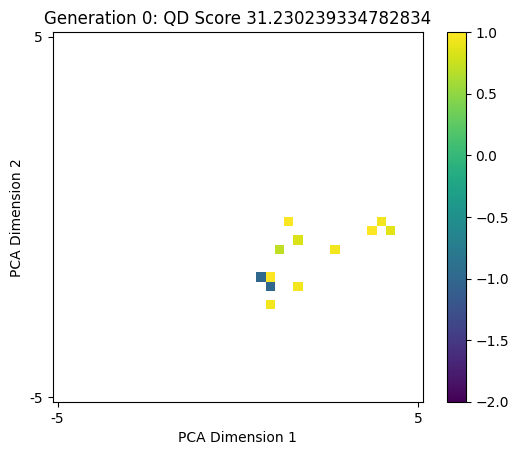

/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


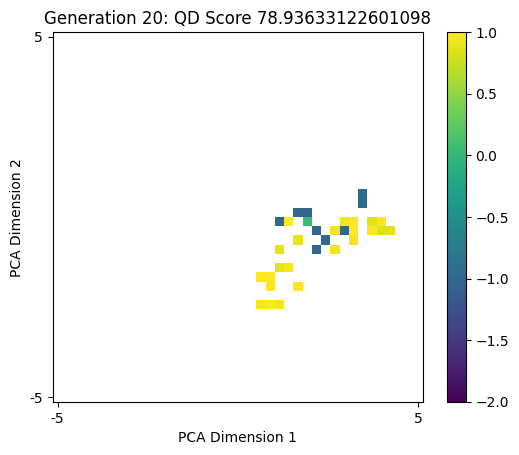

/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


Generation 20: 20-25 improved from 0.9831186581237862 to 0.9908041914333524
Generation 20: 20-35 improved from 0.9523809523809523 to 1.0
Generation 20: 22-26 improved from 0.847012967808987 to 0.8939951382489376
Generation 20: 23-24 improved from 0.7138590203106332 to 0.8821364305578275
Generation 20: 26-22 improved from -1.0 to 1.0
Generation 20: 27-23 improved from -1.0 to 1.0
Generation 20: 27-26 improved from 0.9467528902200998 to 0.9956167428968478
Generation 20: 29-23 improved from 0.9523809523809523 to 1.0


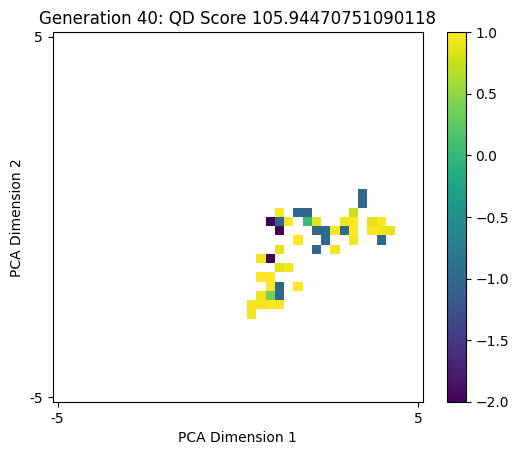

Generation 40: 21-35 improved from 0.832020997375328 to 0.9523809523809523
Generation 40: 21-36 improved from 0.8823529411764706 to 0.8840828823505714
Generation 40: 22-26 improved from 0.8939951382489376 to 0.9902083502861949


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


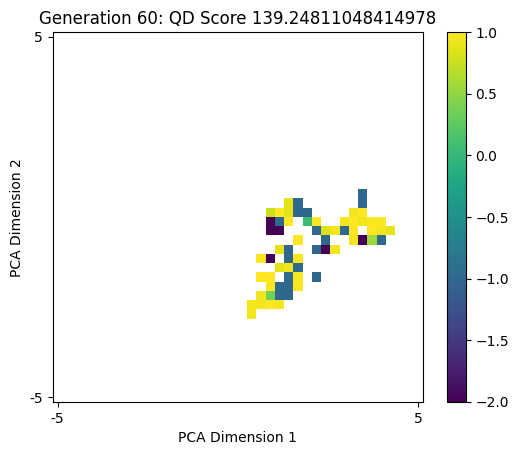

Generation 60: 19-32 improved from 0.7555027141585273 to 0.9523809523809523
Generation 60: 20-28 improved from 0.8797653958944281 to 1.0
Generation 60: 20-34 improved from 0.8823529411764706 to 1.0
Generation 60: 21-29 improved from -1.0 to 0.8450704225352114
Generation 60: 24-22 improved from 0.9386560982539337 to 0.9819105295716929


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


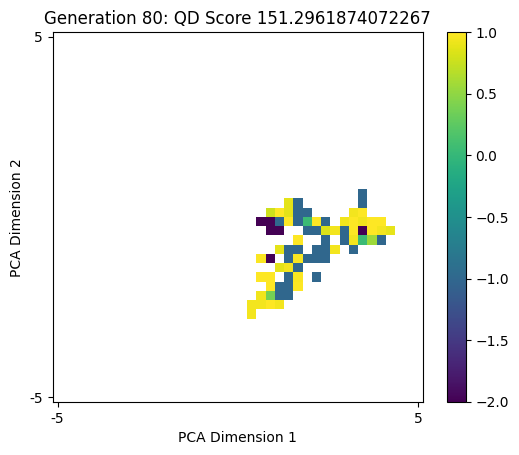

/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


Generation 80: 22-33 improved from -2.0 to 0.04807692307692307
Generation 80: 23-29 improved from -2.0 to -1.0


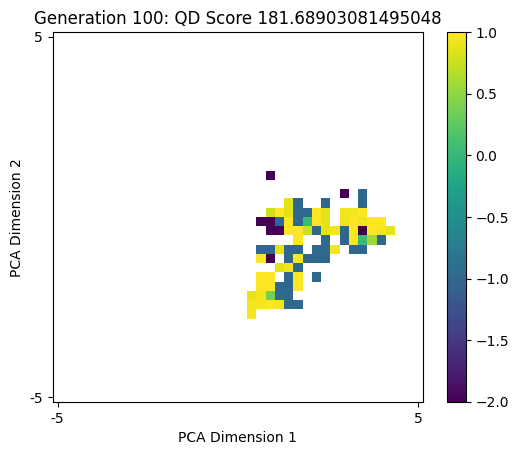

Generation 100: 20-29 improved from -1.0 to 0.8823529411764706
Generation 100: 21-27 improved from -1.0 to 0.7692307692307692
Generation 100: 21-29 improved from 0.8450704225352114 to 0.8653846153846154
Generation 100: 22-32 improved from 0.9523809523809523 to 0.9782608695652175


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


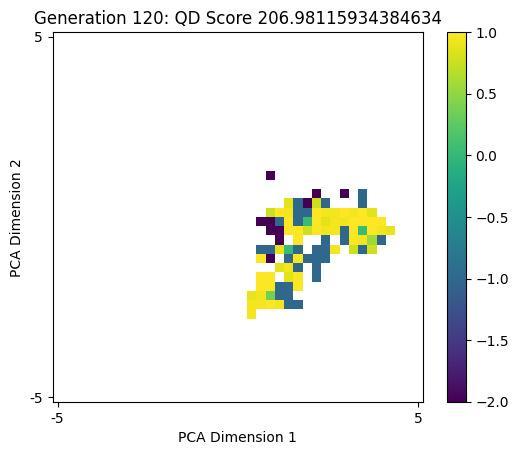

Generation 120: 19-25 improved from 0.8823529411764706 to 0.9523809523809523
Generation 120: 19-29 improved from 0.8823529411764706 to 0.9523809523809523
Generation 120: 19-31 improved from 0.9326424870466321 to 1.0
Generation 120: 20-33 improved from 0.9368627747149006 to 1.0
Generation 120: 21-28 improved from -1.0 to 0.9782608695652175
Generation 120: 21-29 improved from 0.8653846153846154 to 0.9326424870466321
Generation 120: 21-33 improved from -2.0 to 0.04807692307692307
Generation 120: 22-33 improved from 0.04807692307692307 to 0.9523809523809523
Generation 120: 23-25 improved from -1.0 to 0.04799443044572278
Generation 120: 23-32 improved from -1.0 to 0.7692307692307692
Generation 120: 26-25 improved from -1.0 to 0.8823529411764706


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


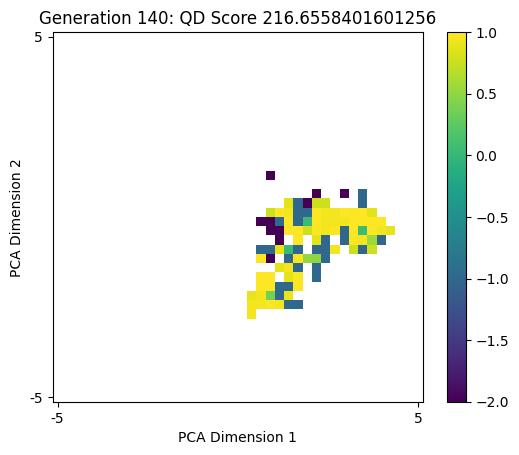

Generation 140: 18-29 improved from -1.0 to 0.7677543186180423
Generation 140: 19-32 improved from 0.9523809523809523 to 0.9782608695652175
Generation 140: 20-27 improved from 0.04777070063694267 to 0.047961630695443645
Generation 140: 20-29 improved from 0.8823529411764706 to 0.9366596952494771
Generation 140: 21-30 improved from 0.9523809523809523 to 0.9782608695652175
Generation 140: 24-27 improved from -1.0 to 0.5106101704449976
Generation 140: 24-28 improved from -1.0 to 0.4986149584487535
Generation 140: 28-25 improved from -1.0 to 0.9090909090909091


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


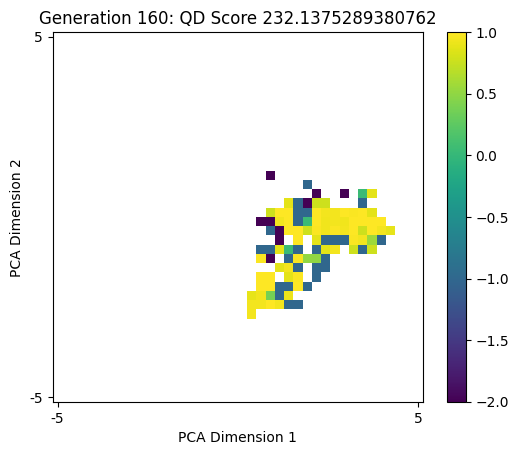

Generation 160: 17-33 improved from -1.0 to 0.04807692307692307
Generation 160: 19-25 improved from 0.9523809523809523 to 1.0
Generation 160: 20-24 improved from -1.0 to 0.9477521263669502
Generation 160: 21-23 improved from -2.0 to -1.0
Generation 160: 21-31 improved from -1.0 to 0.9523809523809523
Generation 160: 21-33 improved from 0.04807692307692307 to 0.7692307692307692
Generation 160: 23-29 improved from -1.0 to 0.8823529411764706


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


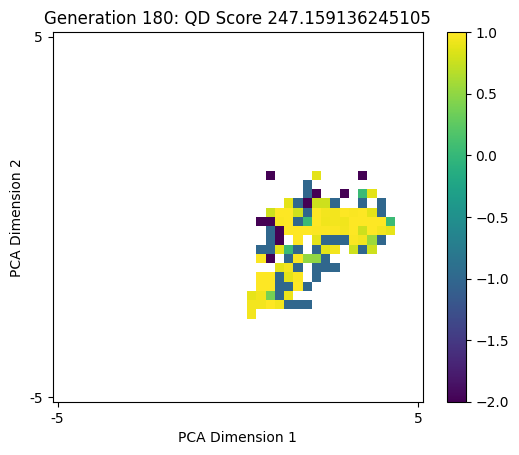

Generation 180: 19-26 improved from -1.0 to 0.7874999999999999
Generation 180: 20-24 improved from 0.9477521263669502 to 0.9782608695652175
Generation 180: 21-27 improved from 0.7692307692307692 to 1.0
Generation 180: 21-29 improved from 0.9326424870466321 to 0.9782608695652175


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


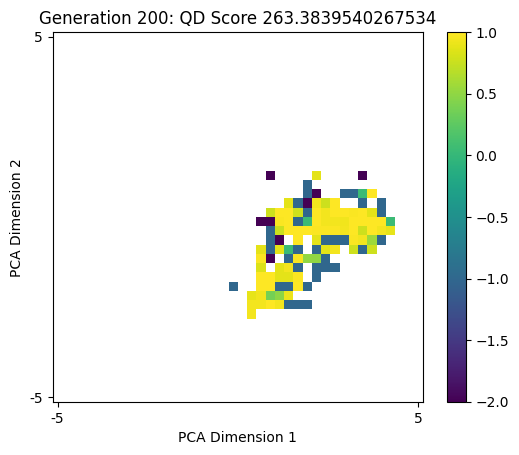

Generation 200: 17-31 improved from -2.0 to -1.0
Generation 200: 17-34 improved from 0.8823529411764706 to 1.0
Generation 200: 18-28 improved from 0.7677543186180423 to 0.9501187648456059
Generation 200: 18-30 improved from -1.0 to 1.0
Generation 200: 19-30 improved from 0.9523809523809523 to 1.0
Generation 200: 20-29 improved from 0.9366596952494771 to 0.9523809523809523
Generation 200: 21-24 improved from -2.0 to 0.7563025210084033
Generation 200: 23-22 improved from -1.0 to 0.8810779687965956
Generation 200: 26-24 improved from -1.0 to 0.8823529411764706
Generation 200: 28-24 improved from -1.0 to 0.49528301886792453


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


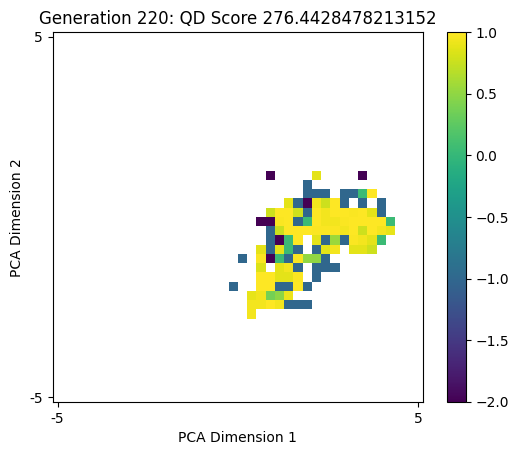

Generation 220: 17-28 improved from -2.0 to -1.0
Generation 220: 20-31 improved from 0.9326424870466321 to 0.9782608695652175
Generation 220: 22-30 improved from -1.0 to 0.5487804878048781
Generation 220: 22-34 improved from 0.5555555555555556 to 0.8823529411764706
Generation 220: 22-35 improved from -1.0 to 0.04807692307692307
Generation 220: 23-32 improved from 0.7692307692307692 to 0.8823529411764706
Generation 220: 23-33 improved from -1.0 to 0.8823529411764706


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


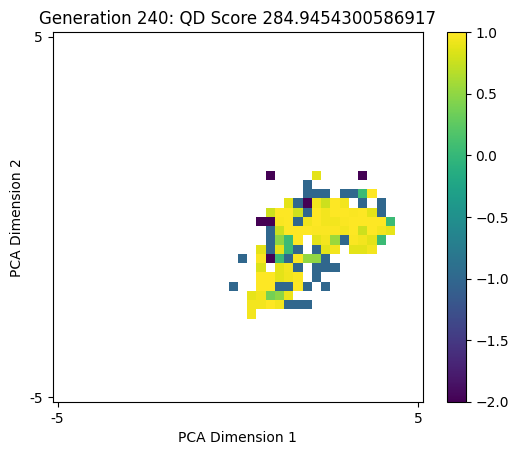

Generation 240: 18-31 improved from -1.0 to 0.9523809523809523
Generation 240: 20-27 improved from 0.047961630695443645 to 0.9326424870466321
Generation 240: 22-24 improved from -2.0 to 0.47620694269195385
Generation 240: 22-29 improved from -1.0 to 0.9523809523809523
Generation 240: 23-34 improved from 0.7692307692307692 to 0.9523809523809523
Generation 240: 26-25 improved from 0.8823529411764706 to 0.936135291597815


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


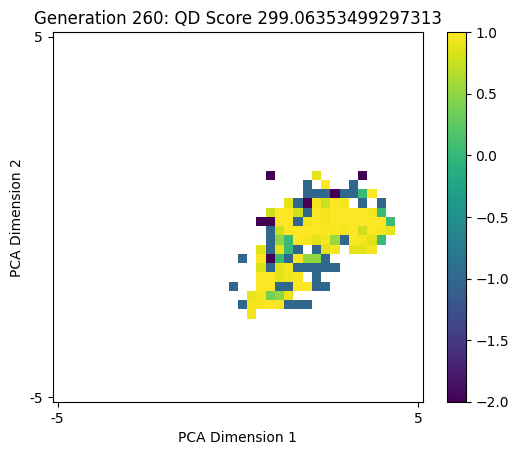

Generation 260: 19-34 improved from 0.8823529411764706 to 0.9523809523809523
Generation 260: 19-35 improved from -1.0 to 0.04807692307692307
Generation 260: 20-30 improved from 0.9523809523809523 to 1.0
Generation 260: 27-27 improved from -1.0 to 1.0


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


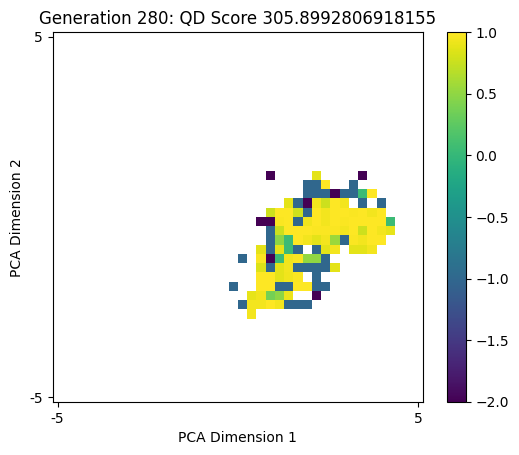

Generation 280: 19-35 improved from 0.04807692307692307 to 0.9992570579494799
Generation 280: 22-34 improved from 0.8823529411764706 to 1.0
Generation 280: 22-35 improved from 0.04807692307692307 to 1.0
Generation 280: 24-25 improved from -1.0 to 0.9326424870466321
Generation 280: 25-30 improved from -1.0 to 0.8823529411764706


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


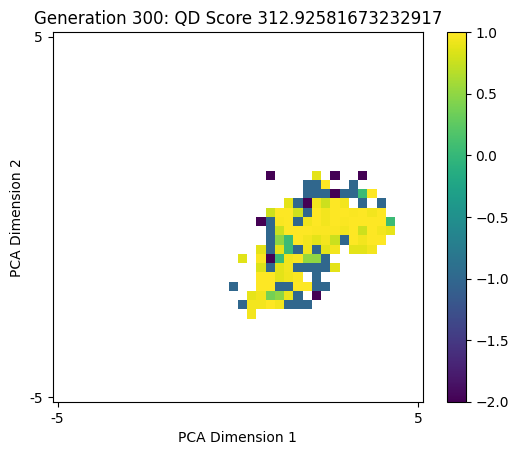

Generation 300: 20-23 improved from -2.0 to -1.0
Generation 300: 22-30 improved from 0.5487804878048781 to 0.7563025210084033
Generation 300: 22-32 improved from 0.9782608695652175 to 1.0
Generation 300: 24-20 improved from -1.0 to 0.8666843449804409


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


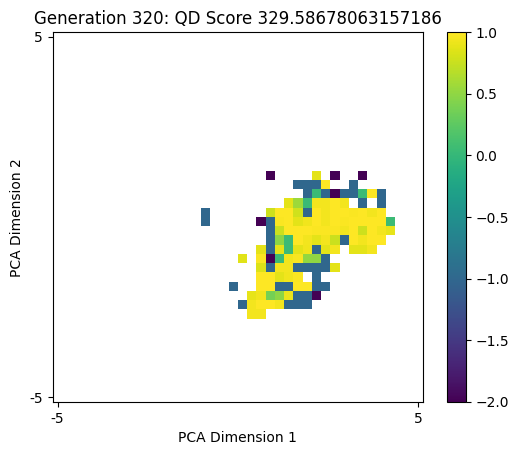

Generation 320: 17-28 improved from -1.0 to 0.04807114529503665
Generation 320: 18-26 improved from -1.0 to 0.5555555555555556
Generation 320: 18-27 improved from -2.0 to 0.04807692307692307
Generation 320: 18-29 improved from 0.7677543186180423 to 0.9523809523809523
Generation 320: 20-26 improved from -1.0 to 0.8823529411764706
Generation 320: 23-26 improved from -1.0 to 0.8726089525033314
Generation 320: 25-24 improved from 0.8823529411764706 to 0.9523809523809523
Generation 320: 29-22 improved from 0.9523809523809523 to 1.0


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


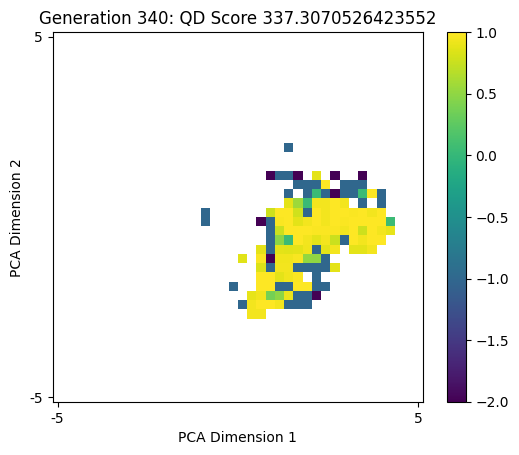

Generation 340: 20-27 improved from 0.9326424870466321 to 0.9523809523809523
Generation 340: 23-25 improved from 0.04799443044572278 to 0.8653846153846154
Generation 340: 24-24 improved from 0.047216472285045316 to 0.9303598327951922


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


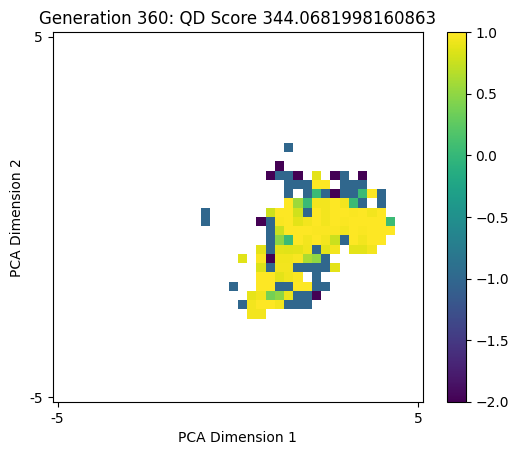

/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


Generation 360: 16-28 improved from -1.0 to 1.0
Generation 360: 18-25 improved from 0.8797216699801191 to 0.9955902306648575
Generation 360: 18-28 improved from 0.9501187648456059 to 0.9501215514263555
Generation 360: 21-33 improved from 0.7692307692307692 to 0.9782608695652175
Generation 360: 21-35 improved from 0.9523809523809523 to 1.0
Generation 360: 21-36 improved from 0.8840828823505714 to 1.0
Generation 360: 22-28 improved from 0.8823529411764706 to 1.0
Generation 360: 24-27 improved from 0.5106101704449976 to 0.6176470588235294


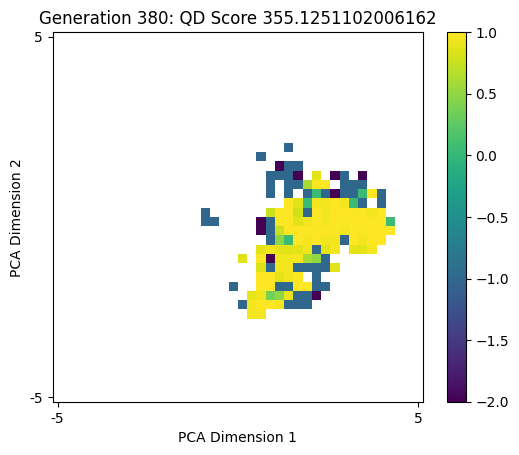

Generation 380: 15-23 improved from -2.0 to -1.0
Generation 380: 16-27 improved from -1.0 to 0.6085042742305535
Generation 380: 18-26 improved from 0.5555555555555556 to 0.8651387441992612
Generation 380: 22-26 improved from 0.9902083502861949 to 1.0
Generation 380: 22-30 improved from 0.7563025210084033 to 0.9523809523809523
Generation 380: 23-23 improved from -1.0 to 0.9329528405692985


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


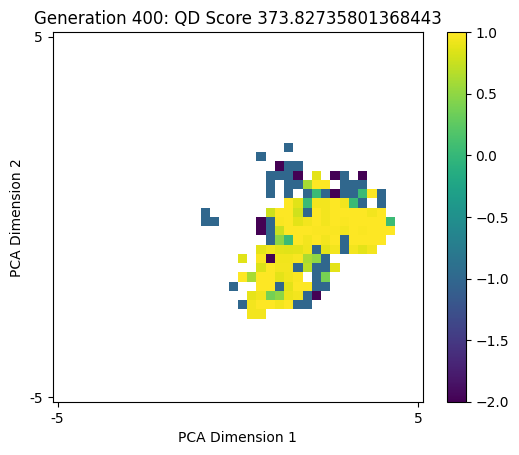

Generation 400: 19-32 improved from 0.9782608695652175 to 1.0
Generation 400: 22-30 improved from 0.9523809523809523 to 1.0
Generation 400: 22-33 improved from 0.9523809523809523 to 1.0
Generation 400: 23-32 improved from 0.8823529411764706 to 0.9523809523809523
Generation 400: 25-23 improved from -1.0 to 1.0
Generation 400: 25-27 improved from -1.0 to 0.6923076923076924
Generation 400: 27-25 improved from -1.0 to 0.8823529411764706
Generation 400: 28-26 improved from -1.0 to 0.9523809523809523
Generation 400: 29-25 improved from -1.0 to 1.0


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


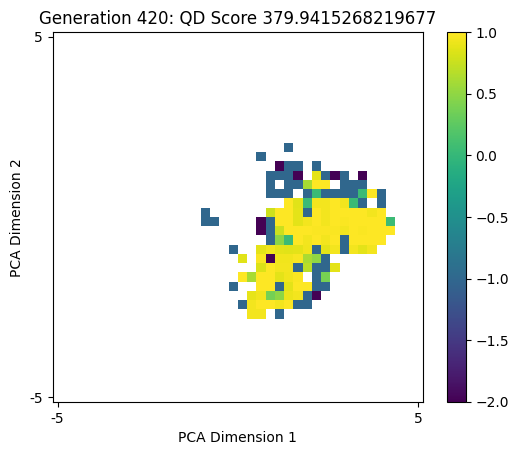

Generation 420: 17-30 improved from -2.0 to -1.0
Generation 420: 19-26 improved from 0.7874999999999999 to 0.8823529411764706
Generation 420: 20-24 improved from 0.9782608695652175 to 0.9975767366720517


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


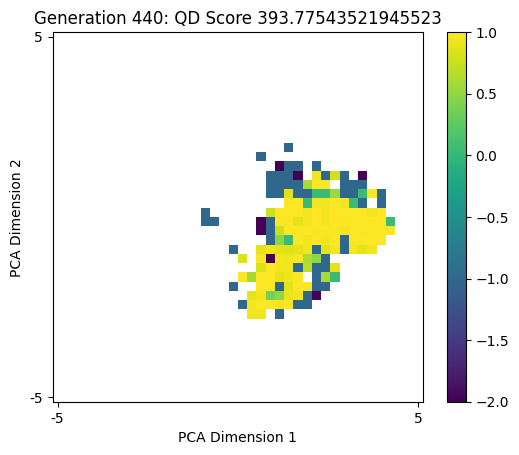

Generation 440: 15-28 improved from 0.8791340274657654 to 0.9523809523809523
Generation 440: 15-30 improved from -2.0 to 0.8027426563275908
Generation 440: 17-25 improved from -1.0 to 0.8695652173913044
Generation 440: 17-29 improved from -1.0 to 0.047879616963064295
Generation 440: 17-30 improved from -1.0 to 0.544041450777202
Generation 440: 18-26 improved from 0.8651387441992612 to 1.0
Generation 440: 19-26 improved from 0.8823529411764706 to 1.0
Generation 440: 19-27 improved from -1.0 to 0.9523809523809523
Generation 440: 24-24 improved from 0.9303598327951922 to 0.9523809523809523
Generation 440: 26-29 improved from 0.3846153846153846 to 0.6060606060606061


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


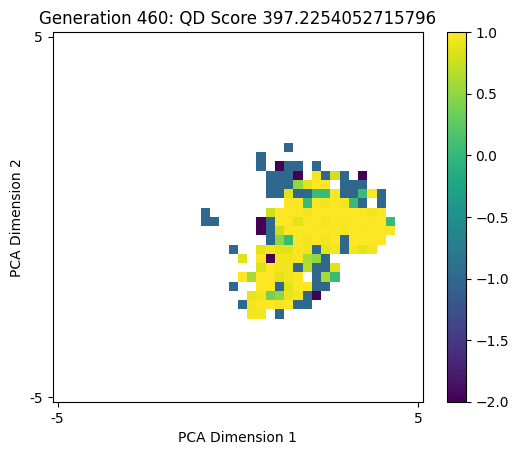

Generation 460: 16-26 improved from -1.0 to 0.5080470814316599
Generation 460: 16-27 improved from 0.6085042742305535 to 0.8796454142516196
Generation 460: 17-30 improved from 0.544041450777202 to 0.9782608695652175
Generation 460: 18-28 improved from 0.9501215514263555 to 0.9782608695652175
Generation 460: 19-29 improved from 0.9523809523809523 to 1.0
Generation 460: 20-27 improved from 0.9523809523809523 to 1.0
Generation 460: 23-26 improved from 0.8726089525033314 to 0.985793951009974


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


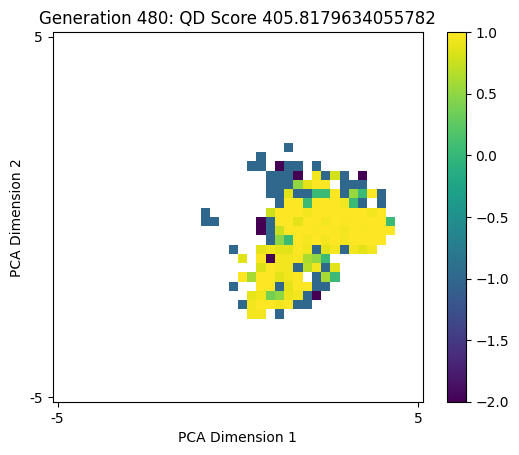

Generation 480: 17-32 improved from -1.0 to 0.5427631578947368
Generation 480: 18-29 improved from 0.9523809523809523 to 1.0
Generation 480: 21-29 improved from 0.9782608695652175 to 1.0
Generation 480: 22-31 improved from -1.0 to 0.9523809523809523
Generation 480: 24-25 improved from 0.9326424870466321 to 0.9474917793430011
Generation 480: 24-28 improved from 0.4986149584487535 to 0.5113636363636364
Generation 480: 24-29 improved from -1.0 to 0.04807692307692307
Generation 480: 25-28 improved from -1.0 to 0.9523809523809523


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/2183908174.py:13: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0


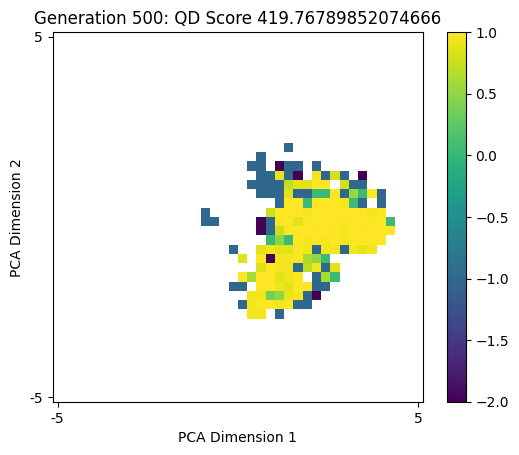

Generation 500: 15-24 improved from -1.0 to 0.893723849372385
Generation 500: 16-25 improved from -1.0 to 0.7263708843040594
Generation 500: 16-26 improved from 0.5080470814316599 to 0.8782623626373628
Generation 500: 16-31 improved from -1.0 to 0.8091141594977912
Generation 500: 20-29 improved from 0.9523809523809523 to 1.0
Generation 500: 22-23 improved from -1.0 to 0.04690902998827274
Generation 500: 22-25 improved from 0.04692903013337724 to 0.04696704346441649
Generation 500: 23-29 improved from 0.8823529411764706 to 0.9523809523809523
Generation 500: 27-24 improved from -1.0 to 0.9183673469387754
Generation 500: 28-21 improved from 0.8848314606741573 to 0.9523809523809523


In [58]:
MAX_GEN = 500
prev_fitnesses = None
for idx, archive_filename in enumerate(archive_filenames):
    archive = pickle.load(open(os.path.join(DATA_DIR, dropdown.value, archive_filename), 'rb'))
    gen = archive_filename.split('_')[-1].split('.')[0]

    if int(gen) > MAX_GEN:
        break

    qd_score = get_qd_score(archive, min_fitness=-2)

    # Fitness array
    fitnesses = np.ones((40, 40)) / 0

    for key, games in archive.items():
        for game in games:
            fitnesses[key] = game.fitness_score
            # fitnesses[key] = game.evaluation["drawishness"]
            # print(game.evaluation.get("error"))
            # print(game.evaluation)

    colormap = plt.cm.viridis
    colormap.set_bad('white')

    plt.imshow(fitnesses, cmap=colormap, vmin=-2, vmax=1)
    plt.xticks([0, 39], labels=[-5, 5])
    plt.yticks([0, 39], labels=[5, -5])
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.title(f'Generation {gen}: QD Score {qd_score}')
    plt.colorbar()
    plt.show()

    if prev_fitnesses is not None:
        for y, x in np.ndindex(fitnesses.shape):
            if prev_fitnesses[y, x] == np.inf:
                continue

            if fitnesses[y, x] == np.inf:
                continue

            if fitnesses[y, x] > prev_fitnesses[y, x]:
                print(f'Generation {gen}: {y}-{x} improved from {prev_fitnesses[y, x]} to {fitnesses[y, x]}')

    prev_fitnesses = fitnesses


/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/4131994371.py:14: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0
/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/4131994371.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'./tmp/fitness_{gen}.png'))
/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/4131994371.py:14: RuntimeWarning: divide by zero encountered in divide
  fitnesses = np.ones((40, 40)) / 0
/var/folders/rd/wt3q313n7j9002x_474dmbz00000gn/T/ipykernel_2592/4131994371.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `impo

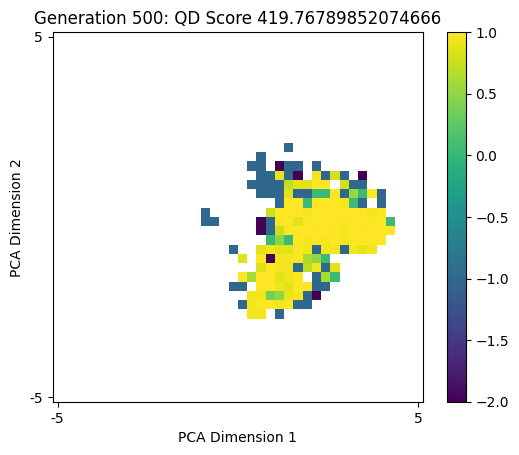

In [57]:
# Generate a GIF
import imageio
import os

images = []

for idx, archive_filename in enumerate(archive_filenames):
    archive = pickle.load(open(os.path.join(DATA_DIR, dropdown.value, archive_filename), 'rb'))
    gen = archive_filename.split('_')[-1].split('.')[0]

    qd_score = get_qd_score(archive, min_fitness=-2)

    # Fitness array
    fitnesses = np.ones((40, 40)) / 0

    for key, games in archive.items():
        for game in games:
            fitnesses[key] = game.fitness_score

    colormap = plt.cm.viridis
    colormap.set_bad('white')

    # Reset the figure
    plt.clf()

    plt.imshow(fitnesses, cmap=colormap, vmin=-2, vmax=1)
    plt.title(f'Generation {gen}: QD Score {qd_score}')
    plt.xticks([0, 39], labels=[-5, 5])
    plt.yticks([0, 39], labels=[5, -5])
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.colorbar()
    plt.savefig(f'./tmp/fitness_{gen}.png')
    images.append(imageio.imread(f'./tmp/fitness_{gen}.png'))

imageio.mimsave(f'./tmp/{dropdown.value}_fitness_evolution.gif', images, duration=5)

# Clean up
for f in os.listdir('./tmp'):
    if f.endswith('.png'):
        os.remove(os.path.join('./tmp', f))

In [ ]:
final_archive = pickle.load(open(os.path.join(DATA_DIR, dropdown.value, archive_filenames[-1]), "rb"))
for key, games in final_archive.items():
    for game in games:
        evaluation = game.evaluation
        eval_str = "| ".join([f"{k}={v:.2f}" for k, v in evaluation.items()])
        new_fit = _evaluate_fitness(evaluation, stats.hmean, verbose=True)
        print(game.original_game_name, game.fitness_score, eval_str, new_fit)
        # print(game.original_game_name)
        break

    # break